In [2]:
# PyTorchライブラリの読み込み
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Pandasライブラリの読み込み
import pandas as pd

# Numpyライブラリの読み込み
import numpy as np

# Matplotlibライブラリの読み込み
from matplotlib import pyplot as plt
%matplotlib inline

In [5]:
dat = pd.read_csv('./data/data.csv', skiprows=[0, 1, 2, 4], encoding='shift-jis')
dat

,年月日,平均気温(℃),平均気温(℃).1,平均気温(℃).2
0,2011/1/1,1.8,8,1
1,2011/1/2,0.4,8,1
2,2011/1/3,-2.3,8,1
3,2011/1/4,-0.8,8,1
4,2011/1/5,1.0,8,1
5,2011/1/6,-1.7,8,1
6,2011/1/7,-3.8,8,1
7,2011/1/8,-0.9,8,1
8,2011/1/9,-1.8,8,1
9,2011/1/10,-3.4,8,1


In [7]:
dat.columns

Index(['年月日', '平均気温(℃)', '平均気温(℃).1', '平均気温(℃).2'], dtype='object')

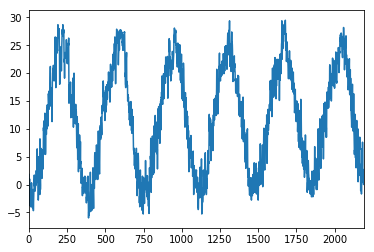

In [8]:
# 平均気温の抽出と可視化
temp = dat['平均気温(℃)']

temp.plot()
plt.show()

In [9]:
# データセットを訓練用とテスト用に分割
train_x = temp[:1461]
test_x = temp[1461:]

# Numpy配列に変換
train_x = np.array(train_x)
test_x = np.array(test_x)

In [10]:
# 説明変数の件数
ATTR_SIZE = 180 # 約6ヵ月分

tmp = []
train_X = []
# データの点を一つずつスライドさせて訓練データを作成
for i in range(0, len(train_x)-ATTR_SIZE):
    tmp.append(train_x[i:i+ATTR_SIZE])
train_X = np.array(tmp)

# データフレーム形式で訓練データを表示
pd.DataFrame(train_X)

,0,1,2,3,4,5,6,7,8,9,...,170,171,172,173,174,175,176,177,178,179
0,1.8,0.4,-2.3,-0.8,1.0,-1.7,-3.8,-0.9,-1.8,-3.4,...,22.7,22.2,26.5,22.9,22.7,19.0,17.4,18.4,23.2,25.8
1,0.4,-2.3,-0.8,1.0,-1.7,-3.8,-0.9,-1.8,-3.4,-3.4,...,22.2,26.5,22.9,22.7,19.0,17.4,18.4,23.2,25.8,26.4
2,-2.3,-0.8,1.0,-1.7,-3.8,-0.9,-1.8,-3.4,-3.4,-3.4,...,26.5,22.9,22.7,19.0,17.4,18.4,23.2,25.8,26.4,24.6
3,-0.8,1.0,-1.7,-3.8,-0.9,-1.8,-3.4,-3.4,-3.4,-4.0,...,22.9,22.7,19.0,17.4,18.4,23.2,25.8,26.4,24.6,24.6
4,1.0,-1.7,-3.8,-0.9,-1.8,-3.4,-3.4,-3.4,-4.0,-3.4,...,22.7,19.0,17.4,18.4,23.2,25.8,26.4,24.6,24.6,25.3
5,-1.7,-3.8,-0.9,-1.8,-3.4,-3.4,-3.4,-4.0,-3.4,-2.6,...,19.0,17.4,18.4,23.2,25.8,26.4,24.6,24.6,25.3,23.6
6,-3.8,-0.9,-1.8,-3.4,-3.4,-3.4,-4.0,-3.4,-2.6,-2.5,...,17.4,18.4,23.2,25.8,26.4,24.6,24.6,25.3,23.6,24.4
7,-0.9,-1.8,-3.4,-3.4,-3.4,-4.0,-3.4,-2.6,-2.5,-0.9,...,18.4,23.2,25.8,26.4,24.6,24.6,25.3,23.6,24.4,24.1
8,-1.8,-3.4,-3.4,-3.4,-4.0,-3.4,-2.6,-2.5,-0.9,0.3,...,23.2,25.8,26.4,24.6,24.6,25.3,23.6,24.4,24.1,24.0
9,-3.4,-3.4,-3.4,-4.0,-3.4,-2.6,-2.5,-0.9,0.3,-1.1,...,25.8,26.4,24.6,24.6,25.3,23.6,24.4,24.1,24.0,25.6
